In [20]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import os


In [42]:
def generate_madx_fodo_lattice(num_cells, filename, outputfile, strengths, magnet_lengths, initbetx, initbetay):
    fodo_template = """
TITLE, '{title}';

! Define sequence
FODO_SEQ: sequence, l=16;
    {elements}
endsequence;

! Define beam
BEAM, particle=POSMUON;

! Use sequence
USE, sequence=FODO_SEQ;

! Perform twiss
twiss, file={outfile}, BETX={initbetaxx}, BETY={initbetayy};

STOP;
"""

    length_per_lattice = 16/num_cells
    midway = length_per_lattice / 2
    magnet_center = magnet_lengths / 2

    elements = []
    for i in range(num_cells):
        first_magnet = i * length_per_lattice + magnet_center
        second_magnet = i * length_per_lattice + magnet_center + midway
        elements.append(f"QF{i + 1}: Quadrupole, K1={strengths}, L={magnet_lengths}, AT={first_magnet};")
        elements.append(f"QD{i + 1}: Quadrupole, K1=-{strengths}, L={magnet_lengths}, AT={second_magnet};")

 
    elements_str = "\n    ".join(elements)

    madx_script = fodo_template.format(title=filename, elements=elements_str, outfile=outputfile, strength=strengths, initbetaxx=initbetx, initbetayy=initbetay)

    with open(filename, "w") as file:
        file.write(madx_script)
    
    print(f"MAD-X script generated and saved as {filename}")

# Specify the number of FODO cells


In [59]:
def generate_madx_fodo_matching(num_cells, filename, outputfile, strengths, magnet_lengths, initbetx, initbetay, constraints):
    fodo_template = """
TITLE, '{title}';

! Define sequence
FODO_SEQ: sequence, l=16;
    {elements}
endsequence;

! Define beam
BEAM, particle=POSMUON;

! Use sequence
USE, sequence=FODO_SEQ;

MATCH, sequence=FODO_SEQ,
    BETX={initbetaxx}, BETY={initbetayy};
    {elements_to_vary}
    LMDIF, calls=100000, tolerance=1E-10;
ENDMATCH;

STOP;
"""

    length_per_lattice = 16/num_cells
    midway = length_per_lattice / 2
    magnet_center = magnet_lengths / 2

    elements = []
    for i in range(num_cells):
        first_magnet = i * length_per_lattice + magnet_center
        second_magnet = i * length_per_lattice + magnet_center + midway
        elements.append(f"QF{i + 1}: Quadrupole, K1={strengths}, L={magnet_lengths}, AT={first_magnet};")
        elements.append(f"QD{i + 1}: Quadrupole, K1=-{strengths}, L={magnet_lengths}, AT={second_magnet};")

 
    elements_str = "\n    ".join(elements)

    for_varying = []
    for i in range(num_cells):
        for_varying.append(f"vary, name=QF{i + 1}->K1, step=.00001")
        for_varying.append(f"vary, name=QD{i + 1}->K1, step=0.00001")


    for i in range(num_cells):
        for_varying.append(f"contraint, sequence=FODO_SEQ, range=DRIFT_{i * 2}, BETX={constraints[i][0]}, BETY={constraints[i][1]}")

    varying_str = "\n    ".join(for_varying)



    madx_script = fodo_template.format(title=filename, elements=elements_str, outfile=outputfile,
                                       strength=strengths, initbetaxx=initbetx, initbetayy=initbetay, elements_to_vary=varying_str)

    with open(filename, "w") as file:
        file.write(madx_script)
    
    print(f"MAD-X script generated and saved as {filename}")

# Specify the number of FODO cells


In [60]:
outputfilename = 'testing.tfs'
madxfilename = "trial3.madx"
num_fodo_cells = 2
magnet_strengths = 1
length_of_magnets = 1
initial_beta_x= 15
initial_beta_y = 5
constraints = [(15,3), (15, 3)]

generate_madx_fodo_matching(num_fodo_cells, madxfilename, outputfilename, magnet_strengths, length_of_magnets, initial_beta_x, initial_beta_y, constraints)


MAD-X script generated and saved as trial3.madx


In [45]:

def plot_twiss_parameters(nameofmadxfile, nameofoutputfile):
    madx_path = '/Users/ryanmichaud/madx_project_2024/madx' 

    subprocess.run([madx_path, nameofmadxfile])


    S=[]
    BETX = []
    BETY = []
    ALPHAX = []
    ALPHAY = []
    data = []
    data = []
    with open(nameofoutputfile) as f:
        for line in f:
            if line.startswith('@') or line.startswith('*') or line.startswith('$'):
                continue
            values = line.split()
            S.append(float(values[2]))
            BETX.append(float(values[3]))
            BETY.append(float(values[6]))
            ALPHAX.append(float(values[4]))
            ALPHAY.append(float(values[7]))

    # Plot BETX and BETY
    plt.figure(figsize=(12, 8))
    plt.plot(S, BETX, label='BETX')
    plt.plot(S, BETY, label='BETY')
    plt.xlabel('Position S (m)')
    plt.ylabel('Beta (m)')
    plt.title('Beta Functions vs. Position')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ALPHAX and ALPHAY
    plt.figure(figsize=(12, 8))
    plt.plot(S, ALPHAX, label='ALPHAX')
    plt.plot(S, ALPHAY, label='ALPHAY')
    plt.xlabel('Position S (m)')
    plt.ylabel('Alpha')
    plt.title('Alpha Functions vs. Position')
    plt.legend()
    plt.grid(True)
    plt.show()


MAD-X script generated and saved as trial.madx
Current Directory: /Users/ryanmichaud/madx_project_2024
Full File Path: /Users/ryanmichaud/madx_project_2024/trial.madx

  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.01  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.12.04               +
  + Execution date: 2024.07.09 11:52:30      +
  ++++++++++++++++++++++++++++++++++++++++++++


TITLE, 'trial.madx';



! Define sequence

FODO_SEQ: sequence, l=16;

    QF1: Quadrupole, K1=1, L=1, AT=0.5;

    QD1: Quadrupole, K1=-1, L=1, AT=4.5;

    QF2: Quadrupole, K1=1, L=1, AT=8.5;

    QD2: Quadrupole, K1=-1, L=1, AT=12.5;

endsequence;



! Define beam

BEAM, particle=POSMUON;



! Use sequence

USE, sequence=FODO_SEQ;



! Perform twiss

twiss, file=testing.tfs, BETX=15, BETY=5;

enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.

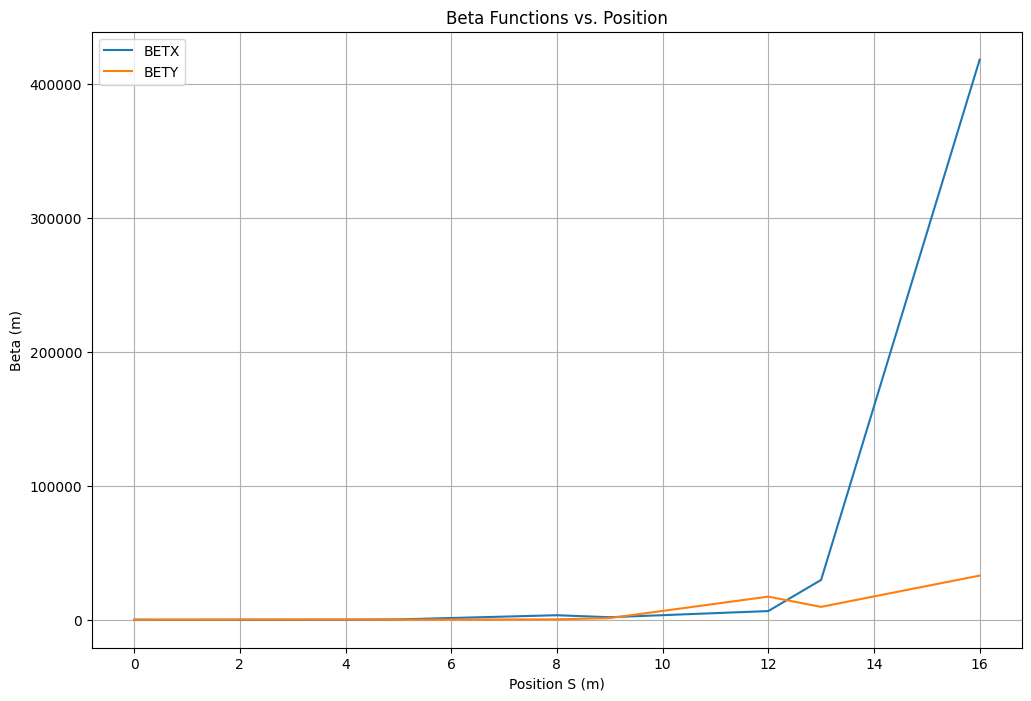

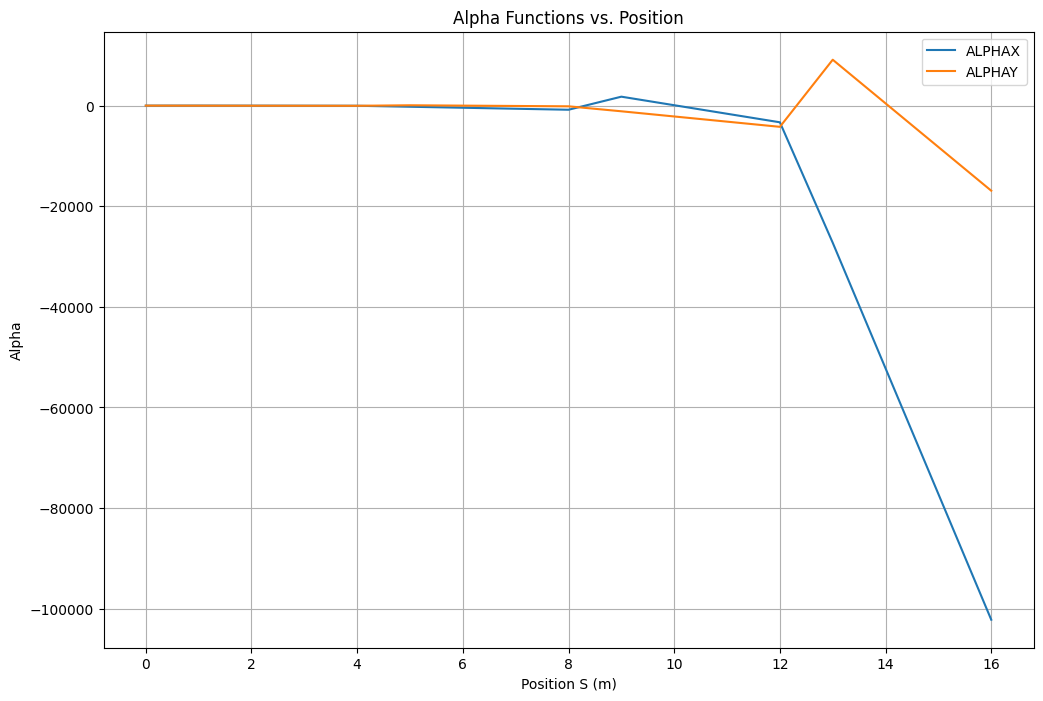

In [51]:
outputfilename = 'testing.tfs'
madxfilename = "trial.madx"
num_fodo_cells = 2
magnet_strengths = 1
length_of_magnets = 1
initial_beta_x= 15
initial_beta_y = 5

generate_madx_fodo_lattice(num_fodo_cells, madxfilename, outputfilename, magnet_strengths, length_of_magnets, initial_beta_x, initial_beta_y)

current_directory = os.getcwd()

filename = madxfilename

file_path = os.path.join(current_directory, filename)

print("Current Directory:", current_directory)
print("Full File Path:", file_path)

plot_twiss_parameters(madxfilename, outputfilename)